In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


# 1- Import libraries

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 2- Read The Dataset

In [29]:
df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 3- Dataset Overview

**Selling_price will be the dependant variable and the rest of the varibales will be condisered as indpendant variables**

In [31]:
df.shape

(301, 9)

**Dataset contain 301 rows and 9 coulmns**

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**object coulmn Description**

In [34]:
df.describe(include='object').T

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


# 4- Data preparation

## 4.1 Feature subset Selection

In [35]:
df['Car_Name'].nunique()

98

**Since Car_Name contains 98 unique categories, and this number of categories is very high compared to the number of dataset samples, it is better to drop it**

In [36]:
df.drop('Car_Name',axis=1,inplace=True)

## 4.2 Feature Transformation

**"Year" shows the car model year. We can replace this column with the cars age attribute.To calculate the age, we consider the origin time to be 1 year older than the maximum model year**

In [37]:
df['Age']=df['Year'].max()+1-df['Year']
df.drop('Year',axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5


## 4.3 Outlier Detection

In [38]:
numerical_cols =[df.select_dtypes(exclude='object').columns]
numerical_cols

[Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age'], dtype='object')]

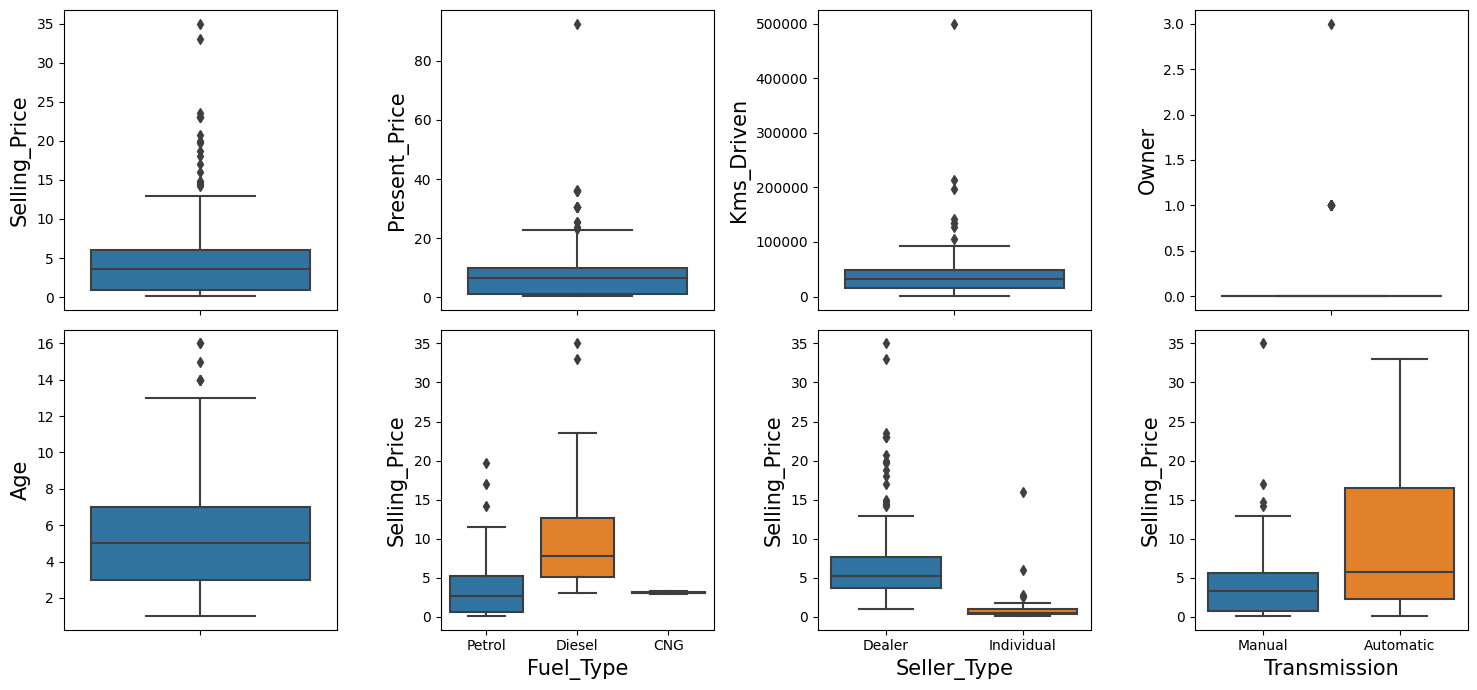

In [39]:
OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values, 
                              df.select_dtypes(include='object').columns.values])
fig, ax = plt.subplots(2, 4, figsize=(15,7),dpi=100)
# the ax plot take indcies from 0 
for i,col in enumerate(OrderedCols):
    x = i//4 # to provide the 0,1 column index in the axis nearset the number to the lower intger
    y = i%4 # to provide 
    if i<5:
        # vixualization for first 5 coulmns which are numerical values 
        sns.boxplot(data=df, y=col, ax=ax[x,y])
        ax[x,y].yaxis.label.set_size(15)
    else:
        # visulaization for the rest of cilumns which is categorical but we will visulalize it VS selling_price
        sns.boxplot(data=df, x=col, y='Selling_Price', ax=ax[x,y])
        ax[x,y].xaxis.label.set_size(15)
        ax[x,y].yaxis.label.set_size(15)

plt.tight_layout()    
plt.show()

**Conlusion the dataset contain outliers in the following coulmns: selling_price,present_price,kms_driven,Transimision,seller_type, fuel_type,seller_type,Transimision**

**We need to identify the indcies of this outliers to see what we will deal with it remove it or not, we will use the interquartile range**

In [40]:
# df['Selling_Price'].unique()

In [41]:
outliers_indexes =[]
target = 'Selling_Price'

# get outliers for the object coulmns
for col in df.select_dtypes(include='object').columns:
    for cat in df[col].unique():
        df1 = df[df[col]==cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr=q3-q1
        maxim = q3+(1.5*iqr)
        minim = q1-(1.5*iqr)
        outlier_samples = df1[(df1[target] < minim) | (df1[target] > maxim)]
        outliers_indexes.extend(outlier_samples.index.tolist())
        
# get outliers for the numerical values     
for col in df.select_dtypes(exclude='object').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr= q3-q1
    maxmim = q3 + (1.5*iqr)
    minmim = q1 - (1.5*iqr)
    outliers_samples = df[(df[col] < minmim) | (df[col] > maxmim)]
    outliers_indexes.extend(outliers_samples.index.tolist())
    
outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified, whose indices are:\n\n{}'.format(len(outliers_indexes), outliers_indexes))

38 outliers were identified, whose indices are:

[27, 37, 39, 50, 51, 52, 53, 54, 179, 184, 58, 59, 189, 62, 63, 64, 191, 66, 192, 196, 69, 193, 198, 201, 77, 205, 79, 80, 82, 84, 85, 86, 92, 93, 96, 97, 106, 241]


**it’s important to investigate the nature of the outlier before deciding whether to drop it or not. We are allowed to delete outliers in two cases:**

* Outlier is due to incorrectly entered or measured data
* Outlier creates a significant association

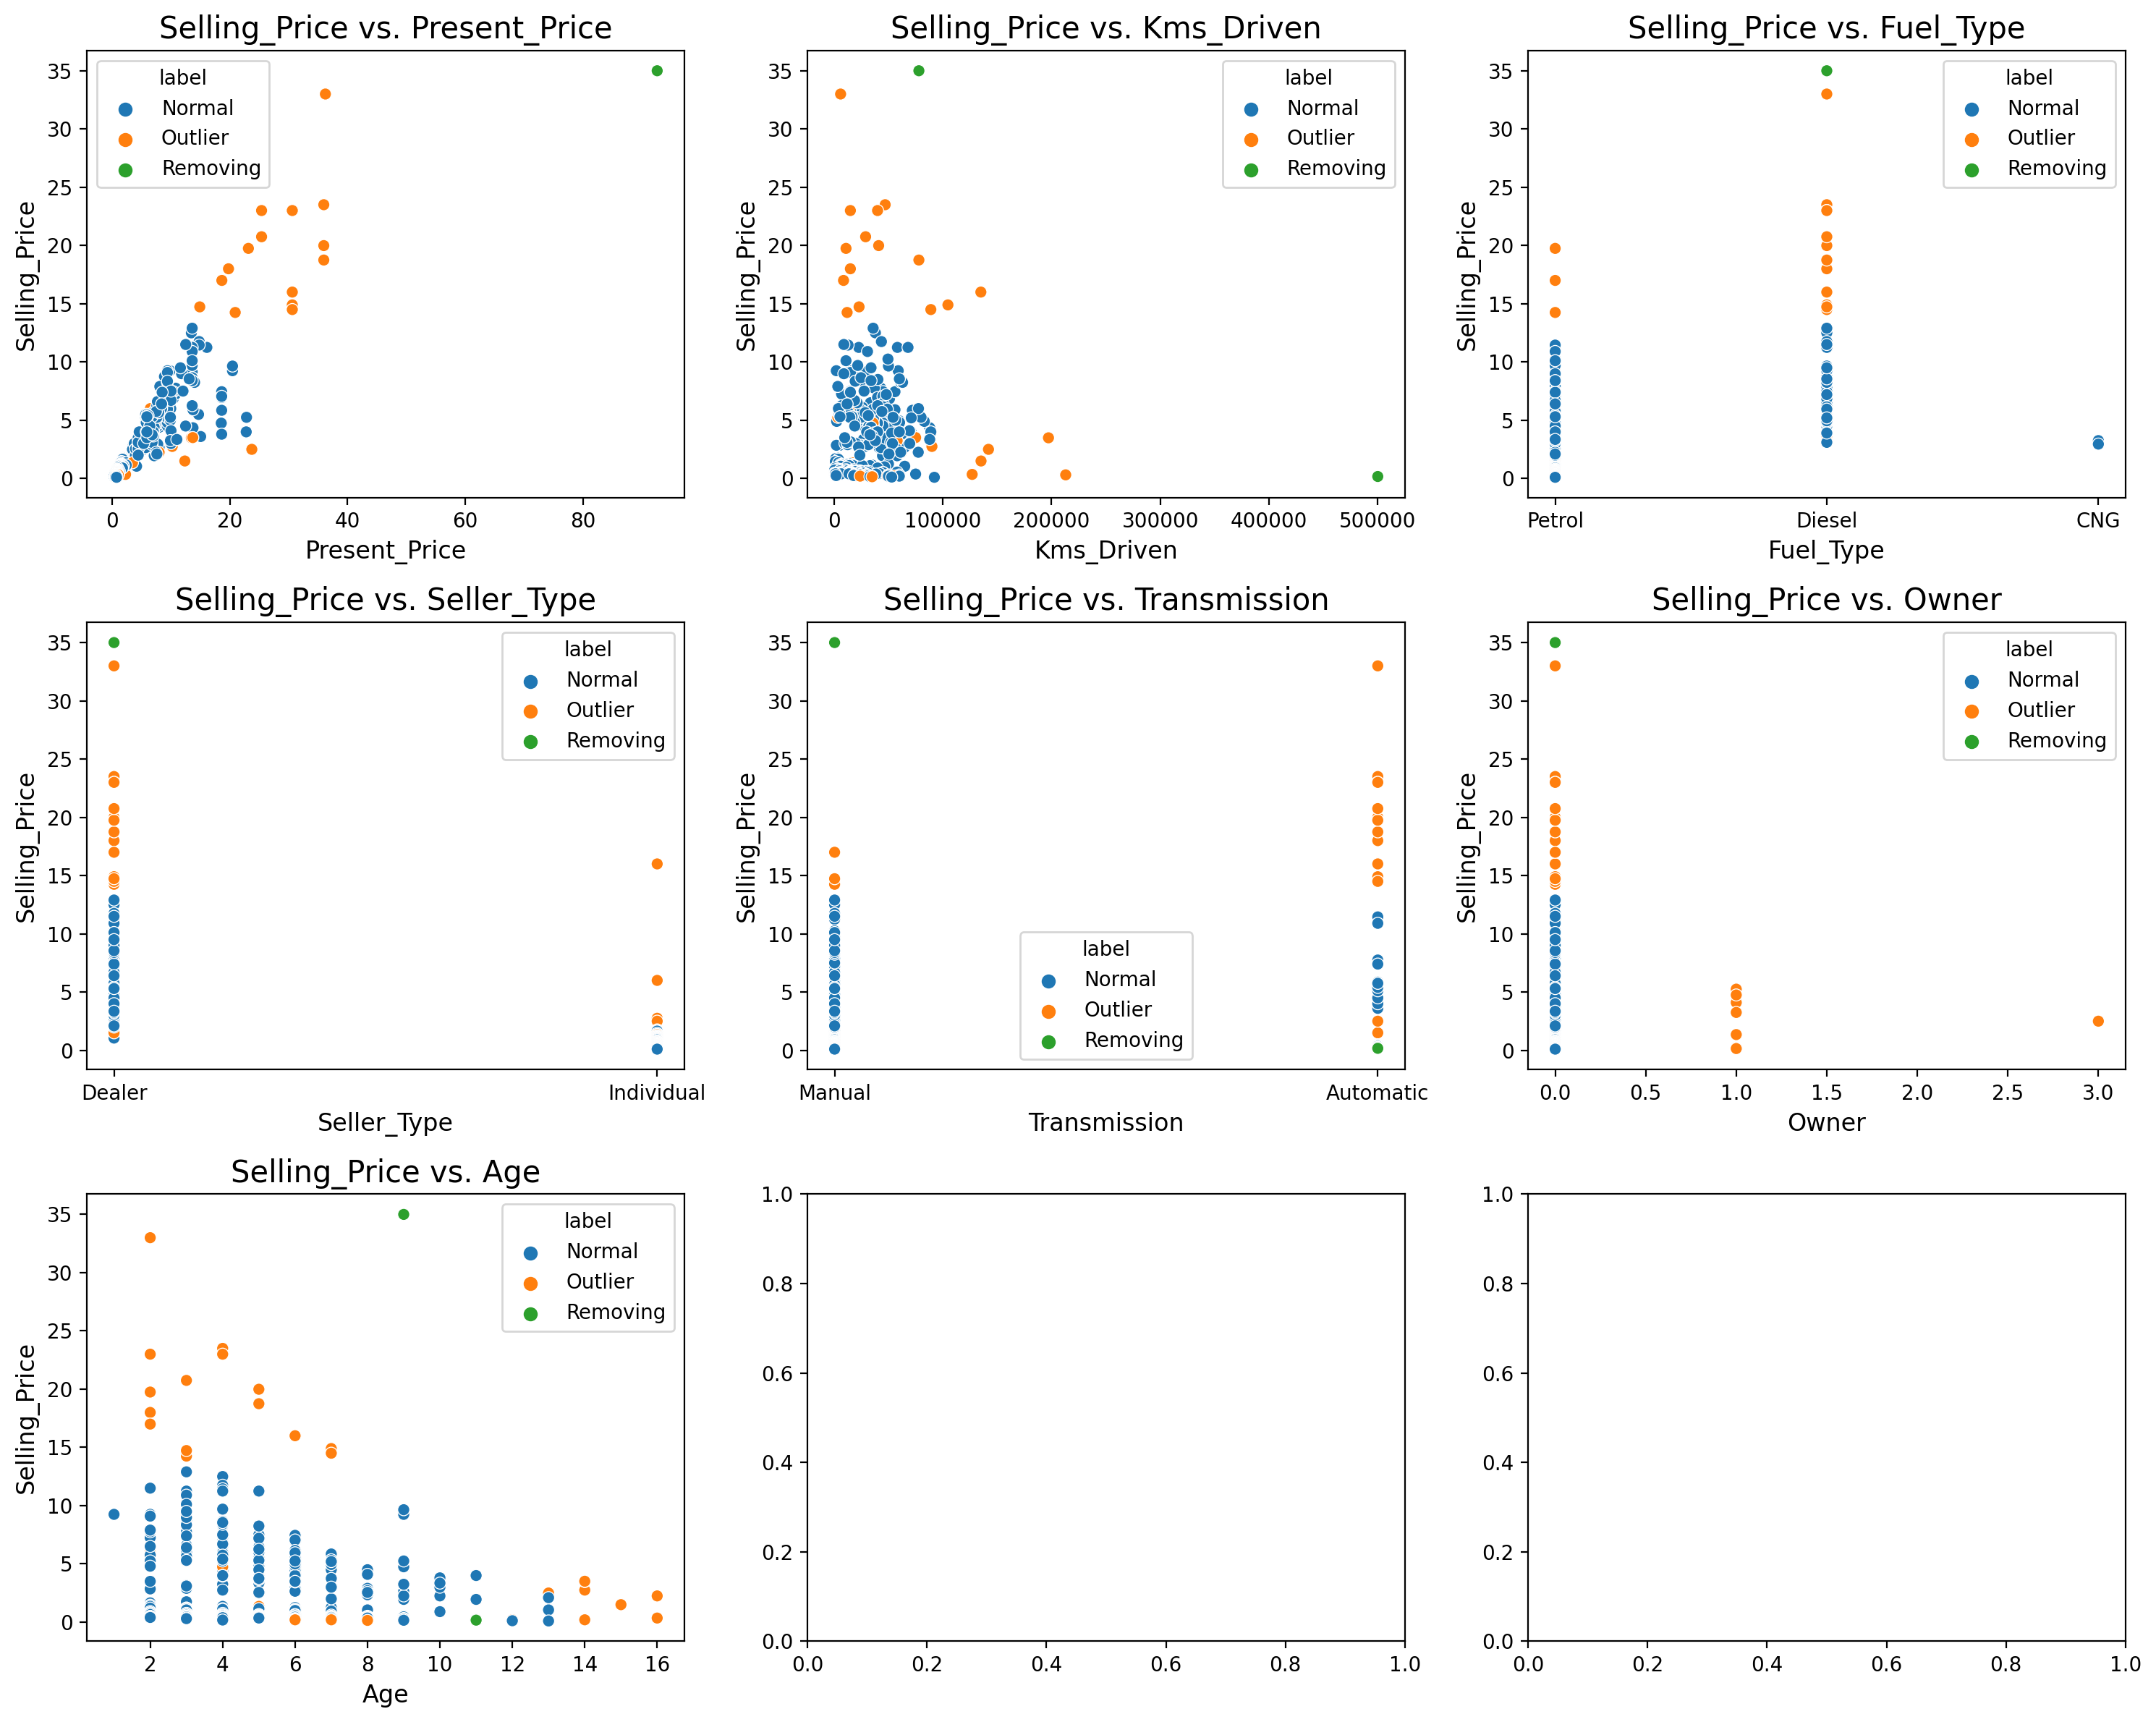

In [42]:
df1= df.copy()
df1['label']='Normal'
df1.loc[outliers_indexes,'label']='Outlier'

# removing indcies
removing_indcies=[]
removing_indcies.extend(df1[df1[target]>33].index)
removing_indcies.extend(df1[df1['Kms_Driven']>400000].index)
df1.loc[removing_indcies,'label'] = 'Removing'


features = df.columns.drop(target)
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1,x=features[i],y=target,hue='label',ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)


#make spaces between the graphs     
plt.tight_layout()

plt.show()



In [43]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,label
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5,Normal
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6,Normal
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2,Normal
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8,Normal
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5,Normal


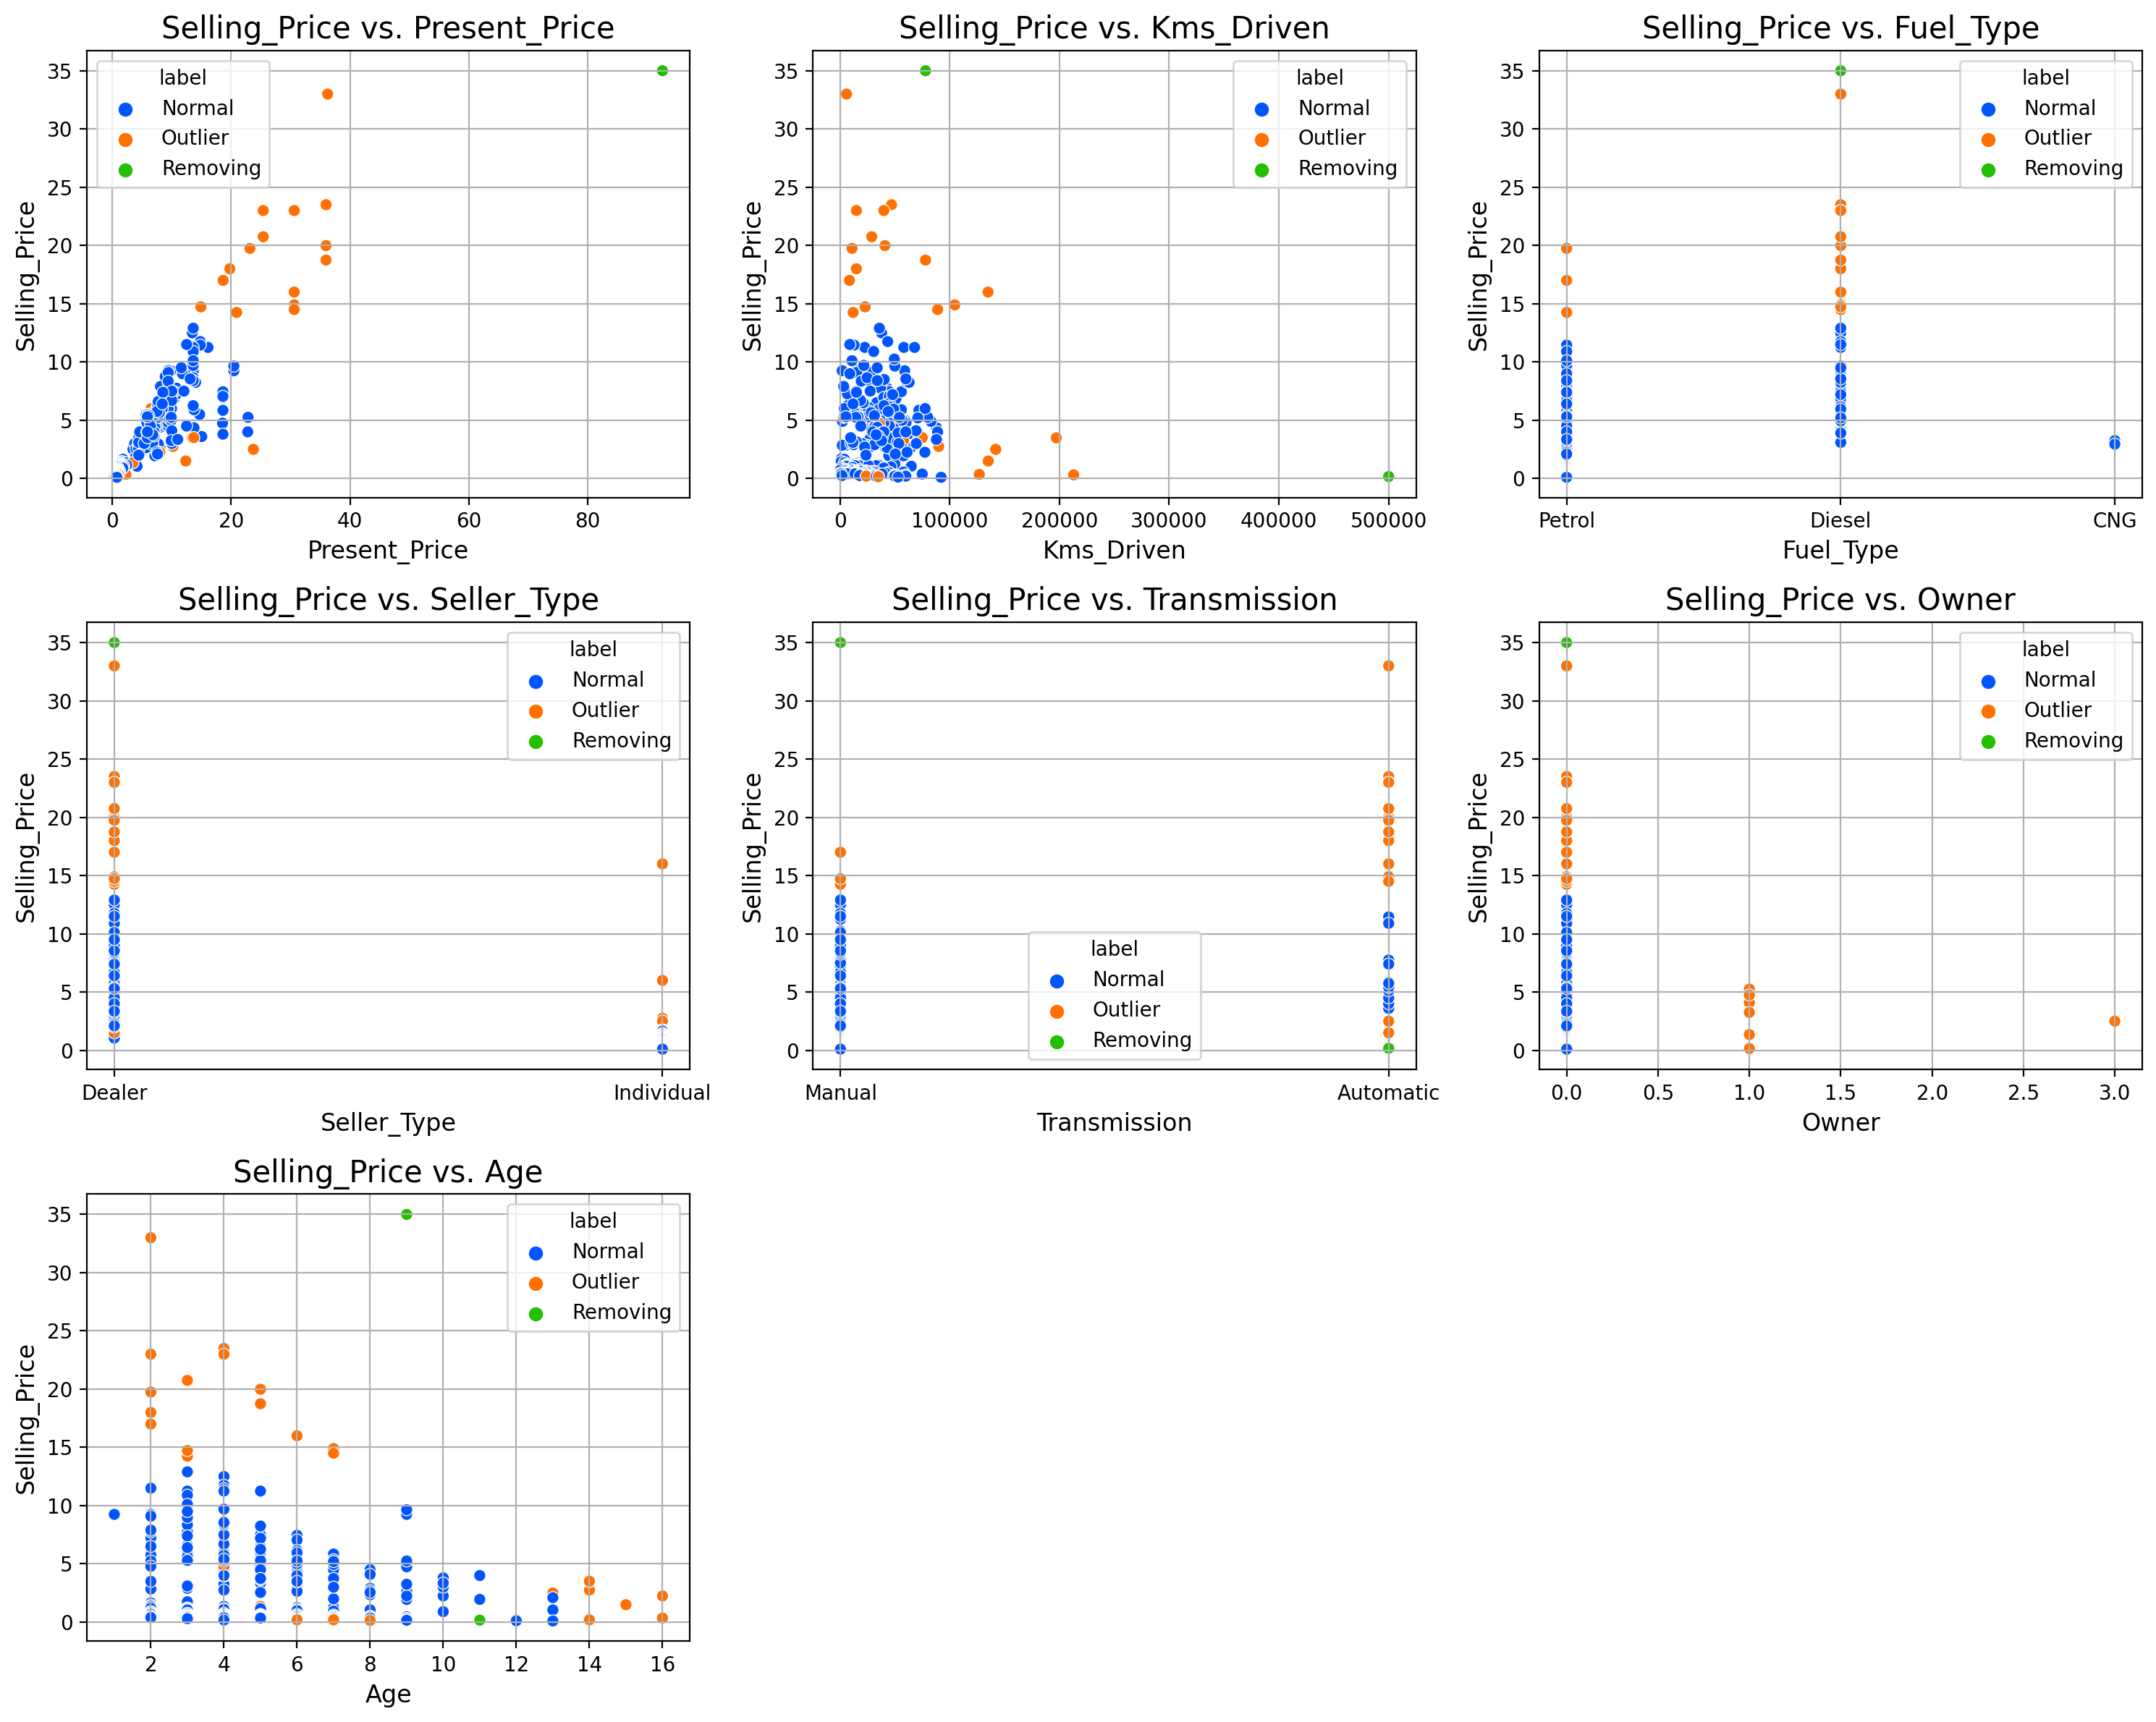

In [44]:
# Outliers Labeling
df1 = df.copy()
df1['label'] = 'Normal'
df1.loc[outliers_indexes,'label'] = 'Outlier'

# Removing Outliers
removing_indexes = []
removing_indexes.extend(df1[df1[target]>33].index)
removing_indexes.extend(df1[df1['Kms_Driven']>400000].index)
df1.loc[removing_indexes,'label'] = 'Removing'
# Plot
target = 'Selling_Price'
features = df.columns.drop(target)
colors = ['#0055ff','#ff7000','#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(nrows=3 ,ncols=3, figsize=(15,12), dpi=200)

for i in range(len(features)):
    x=i//3
    y=i%3
    sns.scatterplot(data=df1, x=features[i], y=target, hue='label', ax=ax[x,y])
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_ylabel(target, size = 12)
    ax[x,y].grid()

ax[2, 1].axis('off')
ax[2, 2].axis('off')
plt.tight_layout()
plt.show()


**outliers indcies**

In [45]:
removing_indexes = list(set(removing_indexes))
removing_indexes

[196, 86]

## 4.4 Discover the missing Values

In [46]:
df.isnull().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64

**No missing values in the dataset**

## 4.5 check duplicates

In [47]:
df.duplicated().value_counts()

False    299
True       2
dtype: int64

In [48]:
df[df.duplicated(keep=False)]


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
15,7.75,10.79,43000,Diesel,Dealer,Manual,0,3
17,7.75,10.79,43000,Diesel,Dealer,Manual,0,3
51,23.00,30.61,40000,Diesel,Dealer,Automatic,0,4
93,23.00,30.61,40000,Diesel,Dealer,Automatic,0,4


**Since it is possible to have cars with the same features, we do not drop duplicates.**

## 4.6 Drop Outliers

In [49]:
df1=df.copy()
df1.drop(removing_indexes,inplace=True)
df1.reset_index(drop=True, inplace=True)


# 5 Exploratory Data Analysis

## 5.1 categorical variables Univarient analysis

In [50]:
# we need to plot a histogram for each categorical variable 

cat_coulmms = df.select_dtypes(include='object').columns
cat_coulmms

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

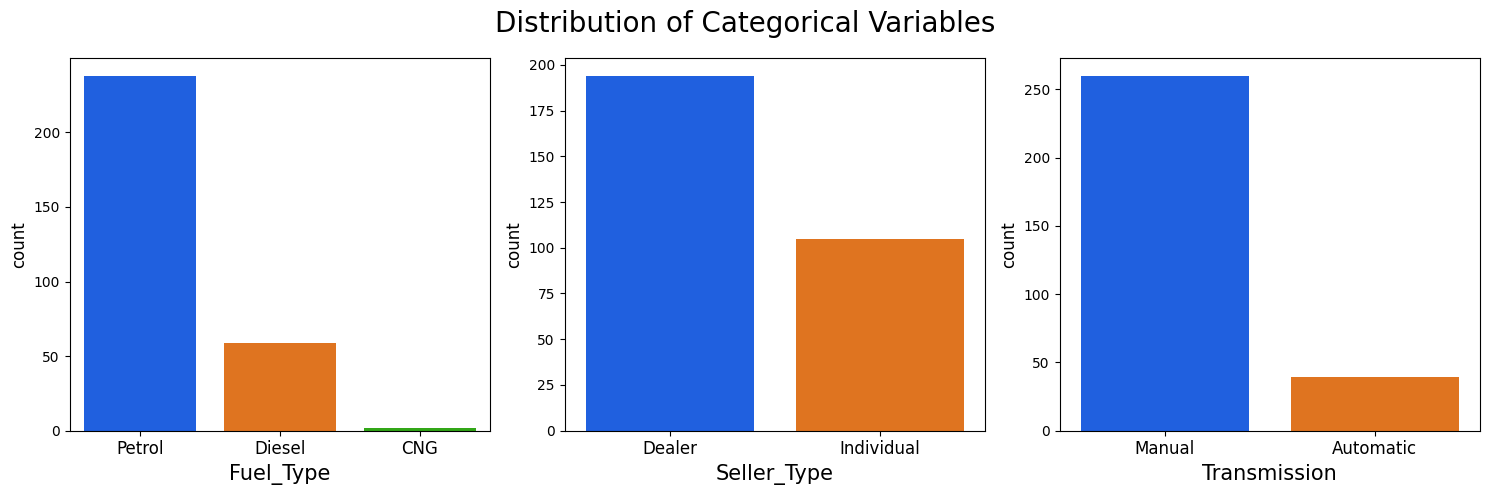

In [51]:
fig , ax = plt.subplots(1,3,figsize=(15,5),dpi=100)

for i in range(len(cat_coulmms)):
    sns.countplot(data=df1,x=cat_coulmms[i],ax=ax[i])
    ax[i].set_xlabel(cat_coulmms[i],fontsize=15)
    ax[i].set_ylabel('count',fontsize=12)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
    
plt.suptitle('Distribution of Categorical Variables', fontsize=20) 
plt.tight_layout()
plt.show() 

* **There are 3 fuel_types petrol>dessel>CNG**
* **There are 2 seller_types dealer is more than individuals**
* **There are 2 Transsimision types the Manual one is the hiegher**

## 5.2 Nmerical variables univariate analysis

In [52]:
num_columns = df.select_dtypes(exclude='object').columns
num_columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Age'], dtype='object')

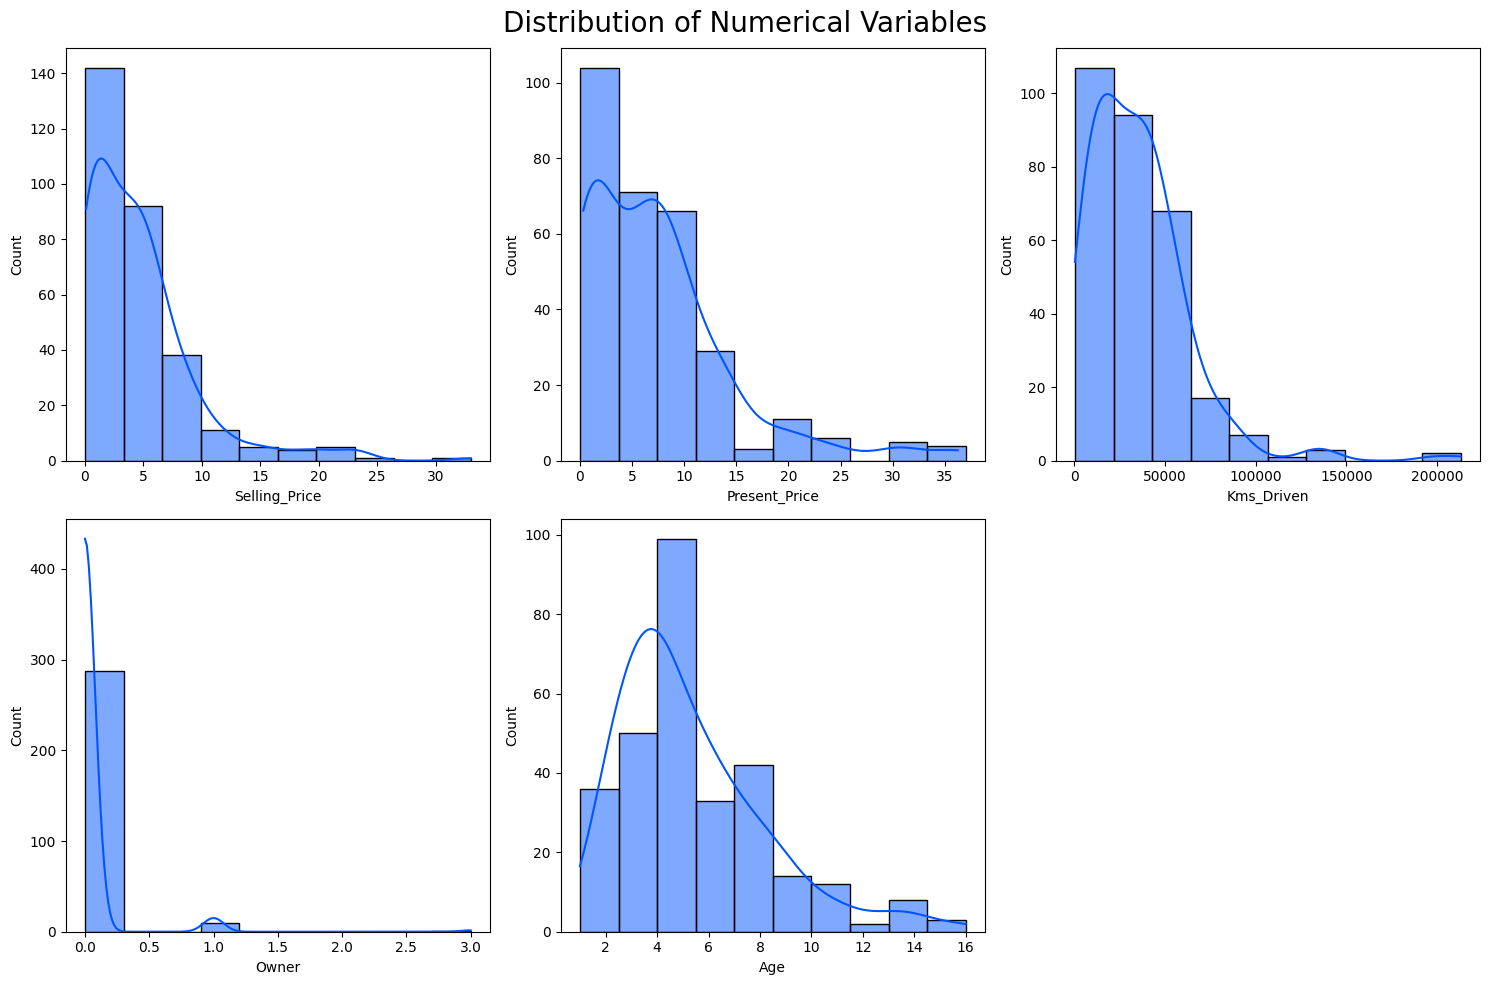

In [53]:
fig , ax = plt.subplots(2,3,figsize=(15,10),dpi=100)

for i in range(len(num_columns)):
    x=i//3
    y=i%3
    values, bin_edges = np.histogram(df1[num_columns[i]], 
                                     range=(np.floor(df1[num_columns[i]].min()), np.ceil(df1[num_columns[i]].max())))
    sns.histplot(data=df1, x=num_columns[i], kde=True, ax=ax[x,y],bins=bin_edges)    
ax[1, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20) 
plt.tight_layout()   
plt.show()


**All the numerical variables is right skewed**

## 5.3 Target vs. Numerical Features Bivariate Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

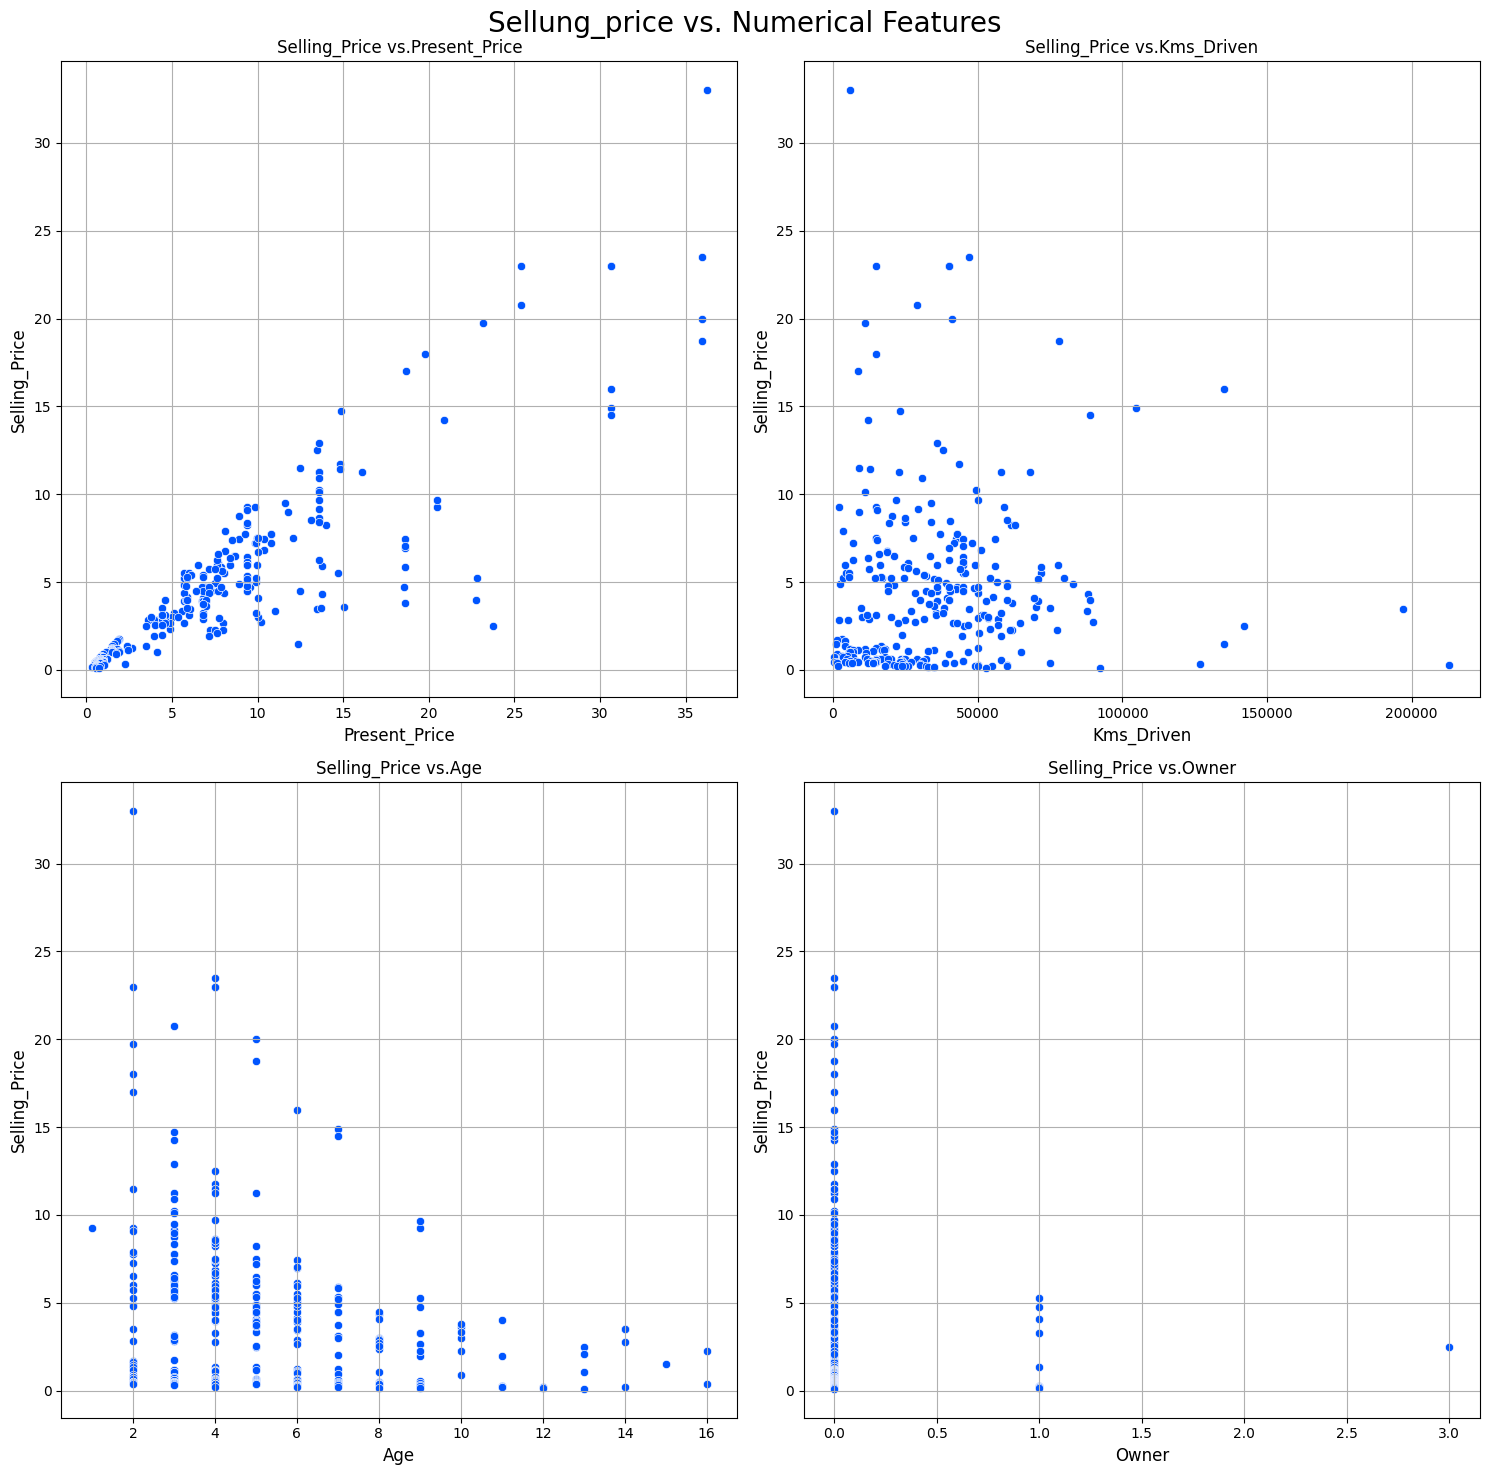

In [54]:
fg,ax=plt.subplots(2,2,figsize=(15,15),dpi=100)
num_features = ['Present_Price', 'Kms_Driven', 'Age', 'Owner']

for i in range(len(num_features)):
    x = i//2
    y = i%2
    sns.scatterplot(df1[num_features[i]],df1[target],ax=ax[x,y])
    ax[x,y].set_title('{} vs.{}'.format(target,num_features[i]),size=12,)
    ax[x,y].set_xlabel(num_features[i],size=12)
    ax[x,y].set_ylabel(target,size=12)
    ax[x,y].grid()
    
plt.suptitle('Sellung_price vs. Numerical Features',size=20)
plt.tight_layout()
plt.show()
    


* **Relation between present_price and selling_price is linear which mean when the present_price increase the selling_price increase**
* **Realtion between KMS_driven and Selling_price in inversaly which mean when kms_driven increase the Sellig_price decrase**
* **Realtion between Age and Selling_price in inversaly which mean when kms_driven increase the Sellig_price decrase**
* **Realtion between Owner and Selling_price in inversaly which mean when kms_driven increase the Sellig_price decrase**

**VIP:**  
**but we need to see the heatmap or the VIF to check these correlation in numbers**

## 5.4 Target vs.Categorical features Bivarient analysis

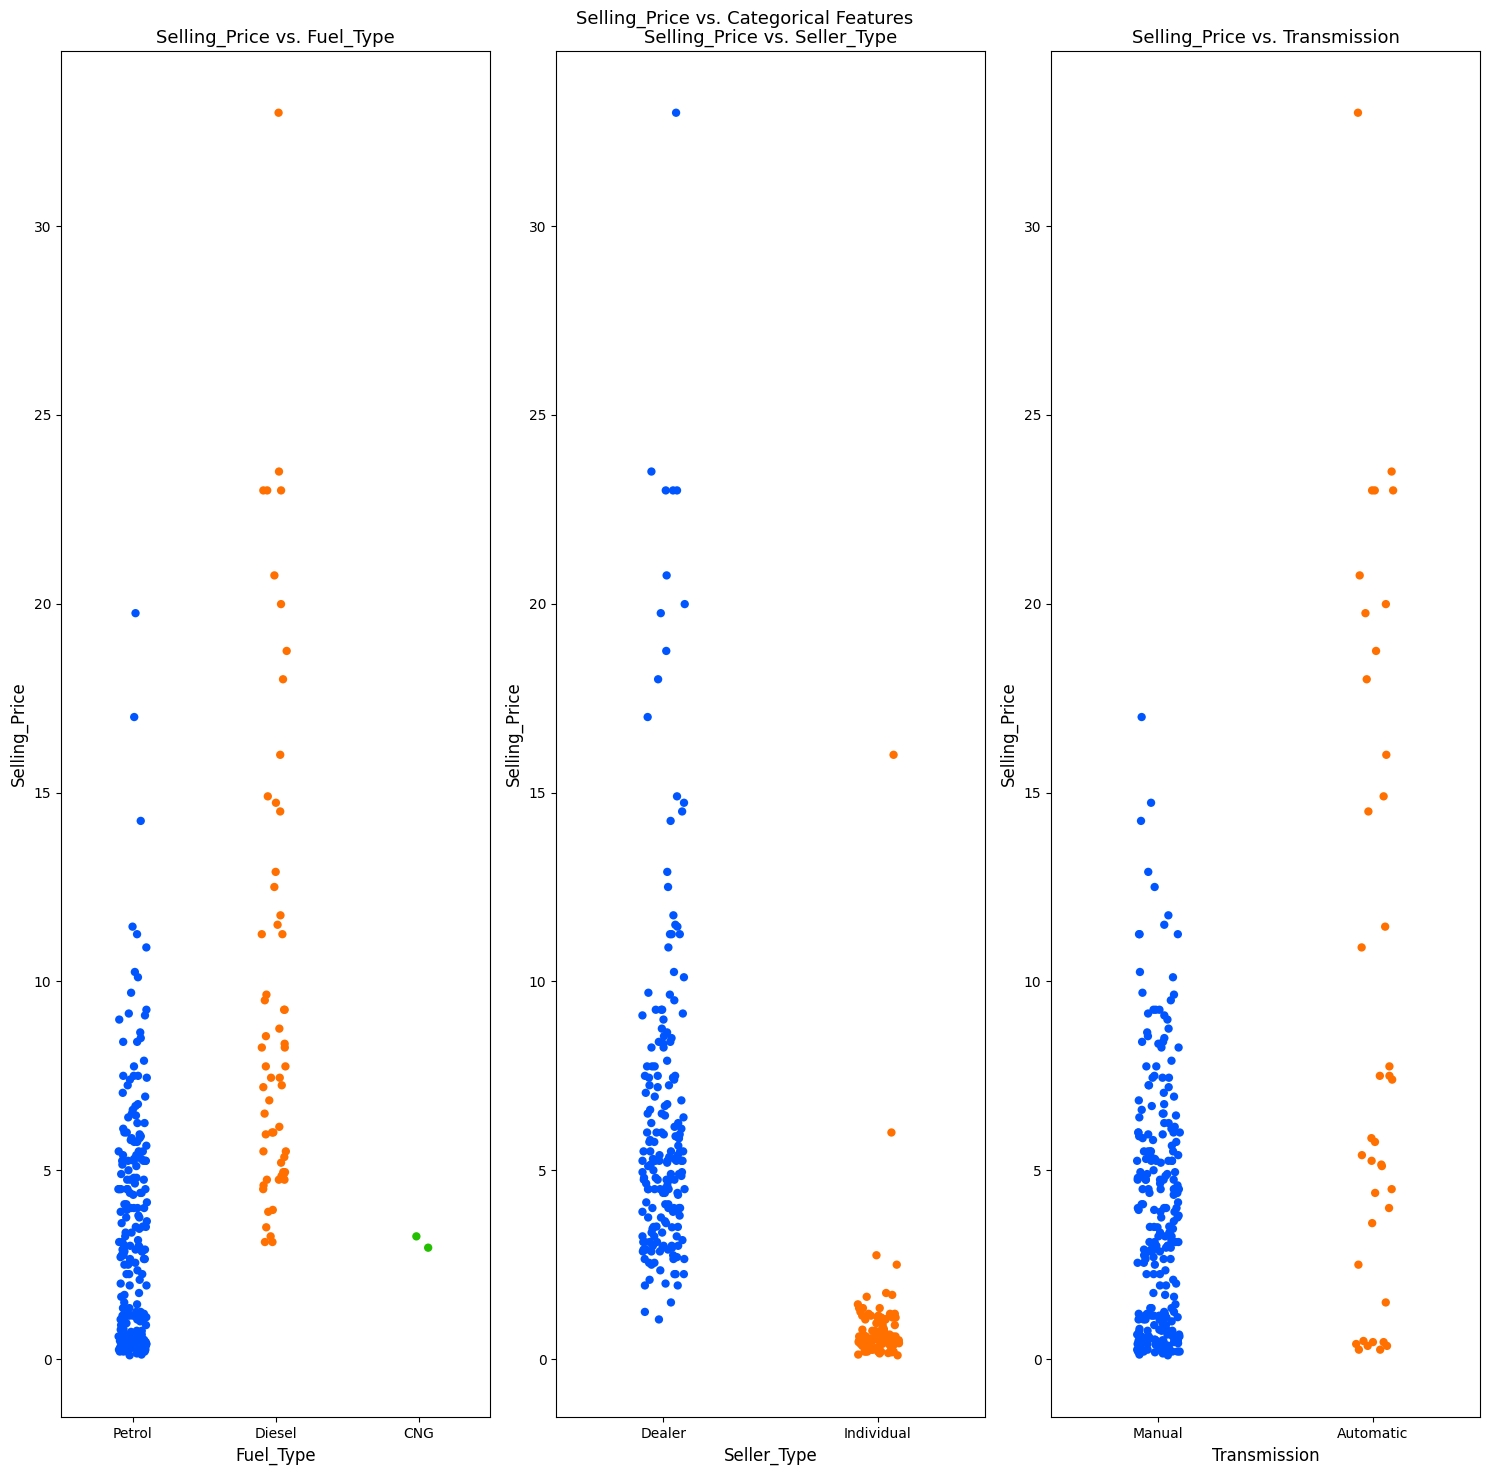

In [55]:
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']
fig , ax = plt.subplots(1,3,figsize=(15,15),dpi=100)

for i in range(len(cat_features)):
   
    sns.stripplot(ax=ax[i], x=cat_features[i], y=target, data=df1, size=6)
    ax[i].set_title('{} vs. {}'.format(target, cat_features[i]), size = 13)
    ax[i].set_xlabel(cat_features[i],size=12)
    ax[i].set_ylabel(target,size=12)
plt.suptitle('Selling_Price vs. Categorical Features',size=13)
plt.tight_layout()
plt.show()



**Diesel Cars > CNG Cars > Petrol Cars in terms of Selling_Price.  
The Selling_Price of cars sold by individuals is lower than the price of cars sold by dealers.  
Automatic cars are more expensive than manual cars.**

## 5.5 Multivariate Analysis

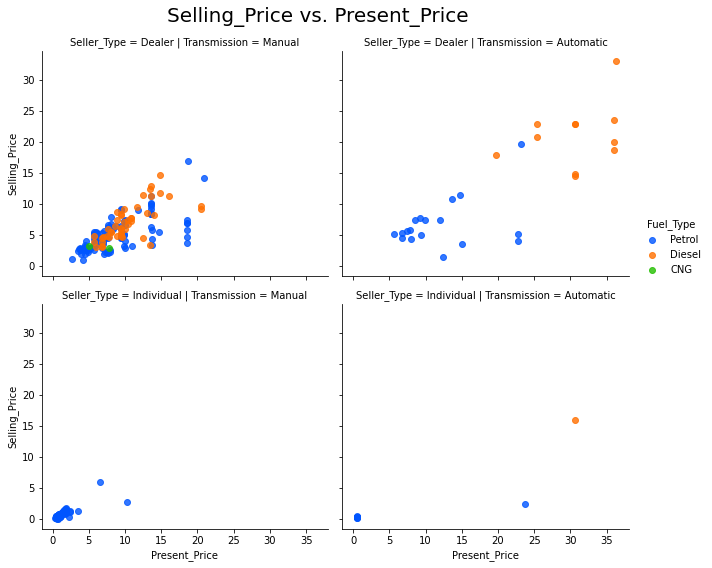

In [56]:
graph = sns.lmplot(x='Present_Price', y='Selling_Price', data= df1, fit_reg=False, row='Seller_Type',
                   col='Transmission', hue='Fuel_Type', height=4, aspect=1)   

plt.suptitle('Selling_Price vs. Present_Price', fontsize=20) 
sns.move_legend(graph,"lower center",bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.tight_layout()
plt.show()

* **All of the Individual Seller_Type have had Petrol cars.**  
* **iesel cars all have belonged to the Dealer Seller_Type**  
* **All of the CNG cars have had Manual Transmission and have belonged to Dealer Seller_Type.**

# 6 Categorical Encoding

In [57]:
CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']

df1 = pd.get_dummies(df1, columns=CatCols, drop_first=True)
df1.head(5)

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,5,0,1,0,1
1,4.75,9.54,43000,0,6,1,0,0,1
2,7.25,9.85,6900,0,2,0,1,0,1
3,2.85,4.15,5200,0,8,0,1,0,1
4,4.60,6.87,42450,0,5,1,0,0,1


# 7 Correlation analysis

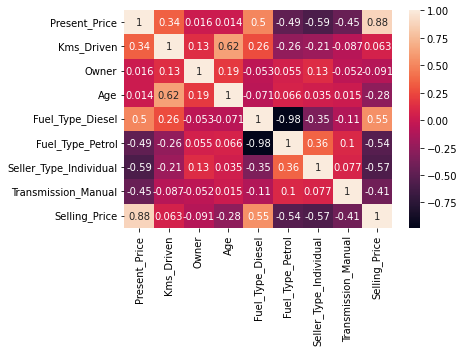

In [58]:
sns.heatmap(pd.concat([df1.drop(target,axis=1), df1[target]],axis=1).corr(),annot=True)
plt.show()

* **The target variable "Selling Price" is highly correlated with Present_Price & Seller_Type & Fuel_Type.**  
* **Some independent variables like Fuel_Type_Petrol and Fuel_Type_Disel are highly correlated, which is called Multicollinearity.**  



# 8 Build linear Rgression Model

## 8.1 Determine Features and Traget variables

In [59]:
X=df1.drop('Selling_Price',axis=1)
y=df1['Selling_Price']

## 8.2 Split Dataset into train and test

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (209, 8)
X_test shape:  (90, 8)
y_train shape:  (209,)
y_test shape:  (90,)


In [61]:
y_test_actual = y_test


## 8.2 Scale Data using Standard Scaler

In [62]:
scaler =StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 8.4 Train the model

In [63]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled,y_train)

LinearRegression()

## 8.5 Evaluate the model

In [64]:
def model_evaluation(model,X_test,y_test,model_name):
    y_pred = model.predict(X_test)
    MAE=metrics.mean_absolute_error(y_test,y_pred)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    r2_score = metrics.r2_score(y_test,y_pred)
    
    return pd.DataFrame([MAE,MSE,RMSE,r2_score],index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(linear_reg,X_test_scaled,y_test,'linear_regresion')

,linear_regresion
MAE,1.198867
MSE,3.714913
RMSE,1.927411
R2-Score,0.887245


**The linear regression model obtained R2-score of %88.72 .**

## 9 check Assumption of linear model

## 9.1 Assumption1: Linearity (correct functional form)

**This assumption assume there is a linear realtionship between the predictors(x) and the outcomes(y)**  
**to detect the non linearity:**  
* **plots of actual vs. predicted values -> The desired output is that points is symmetric around the diagonal line**
* **plots of tesiduals vs. predicted values -> The desired outcome is that points are symetrically distributed around horizontal line**


In [65]:
def residuals(model, X_test, y_test):
    # we need to find the differnce between the predicted and the actual 
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
    df_results['Residuals'] = abs(df_results['Actual']-df_results['Predicted'])
    
    return df_results

In [66]:
# define function to detect the linear assumption by plot 2 garphs
# 1- actual vs predicted
# 2- residulas vs predicted 
def linear_assumption(model,X_test,y_test):
    df_results = residuals(model,X_test,y_test)
    
    # design the figure paramters
    fig,ax= plt.subplots(1,2,figsize=(15,6),dpi=100)
    # first plot
    sns.regplot(x='Predicted', y='Actual', data=df_results, lowess=True, ax=ax[0],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12)
    
    # second plot 
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True, ax=ax[1],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residuals', fontsize=12)
    

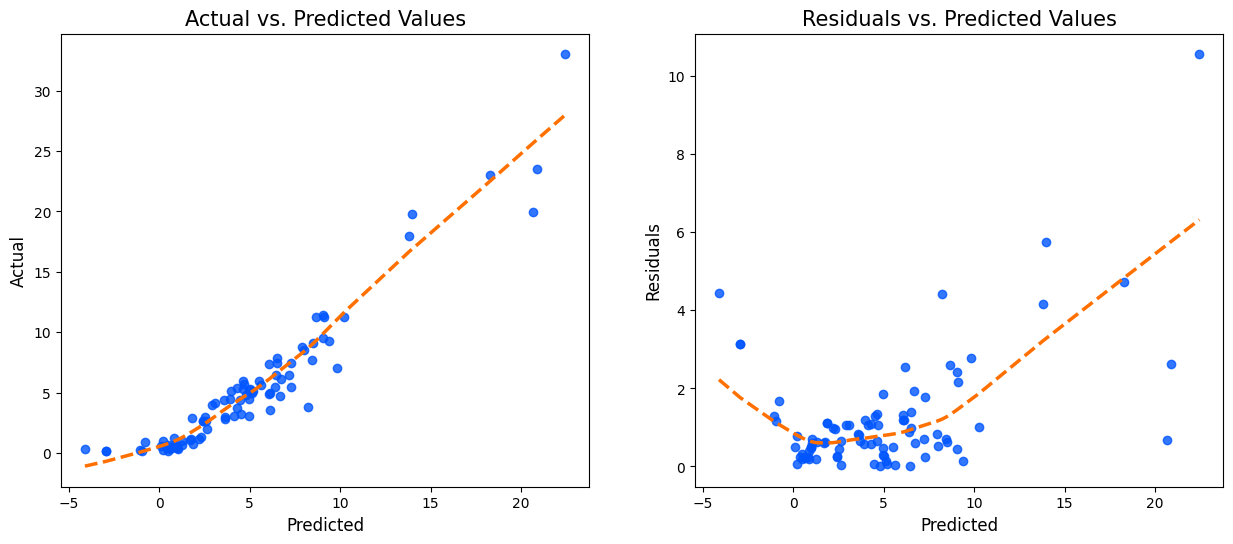

In [67]:
# check the assumptions
linear_assumption(linear_reg, X_test_scaled, y_test)


**As we cna see for the predicted vs. actual plot the it seems to be linear realtion**  
**But if we look at the residuals vs. predicted the points are not symmetric about the line and the line is not horizontal also**  
**Also there is a big probelm here whihc in the variavnce not constant and we need it constant**

**Solution**  
* **We change the function of linear regression which is known as nonlinear transformation**

## 9.2 Assumtion 2: Normality ( residuals normality)

**This assumes that the error terms of the model are normally distributed with a mean value of zero.** 

**This can actually happen if either the predictors or the label are significantly non-normal. Other potential reasons could include the linearity assumption being violated or presence of a few large outliers in data affecting our model.**

**A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals. When the residuals distribution significantly departs from Gaussian, confidence intervals may be too wide or too narrow. Technically, we can omit this assumption if we assume instead that the model equation is correct and our goal is to estimate the coefficients and generate predictions (in the sense of minimizing mean squared error). However, normally we are interested in making valid inferences from the model or estimating the probability that a given prediction error will exceed some threshold in a particular direction. To do so, the assumption about the normality of residuals must be satisfied.**

**To investigate this assumption we can check:**  

* **Check residuals histogram**  
* **Quantile-Quantile probability plot -> plotting the residuals vs the order of statistic**  
* **Anderson-Darling test**  

In [68]:
# anderson-Darling Test
from statsmodels.stats.diagnostic import normal_ad
# for q_q plot
from scipy import stats

def normal_errors_assumption(model,X_test,y_test,p_value_thresh=0.05):
    
    df_results = residuals(model, X_test, y_test)
    
    #Anderson-Darling-test
    p_value = normal_ad(df_results['Residuals'])[1]
    print('\nP-value from the test (below 0.05 generally means non-normal):  ', np.round(p_value,6))
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed. Assumption not satisfied.') 
    else:
        print('Residuals are normally distributed. Assumption satisfied.')
        
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)

        #reiduals histogram 
    sns.histplot(data=df_results, x='Residuals', kde=True, ax=ax[0], bins=15, 
                 color='#0055ff', edgecolor='none', alpha=0.4, line_kws={'lw': 2.5})
    ax[0].set_xlabel('Residuals', fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_title('Distribution of Residuals', fontsize=15)
    textstr = '\n'.join((
        r'$\mu=%.2f$' %np.mean(df_results['Residuals']),
        r'$\sigma=%.2f$' %np.std(df_results['Residuals']),
        ))
    ax[0].text(0.7, 0.9, textstr, transform=ax[0].transAxes, fontsize=15, verticalalignment='top',
                 bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))
    

    # Q-Q Probability Plot
    stats.probplot(df_results['Residuals'], dist="norm", plot= ax[1])
    ax[1].set_title("Residuals Q-Q Plot", fontsize=15)
    ax[1].set_xlabel('Theoretical Quantiles', fontsize=12)
    ax[1].set_ylabel('Ordered Values', fontsize=12)
    ax[1].get_lines()[0].set_markerfacecolor('#509aff')
    ax[1].get_lines()[1].set_color('#ff7000')
    ax[1].get_lines()[1].set_linewidth(2.5)
    ax[1].get_lines()[1].set_linestyle('--')
    ax[1].legend(['Actual','Theoretical'])
    
    plt.show()

    
    



P-value from the test (below 0.05 generally means non-normal):   0.0
Residuals are not normally distributed. Assumption not satisfied.


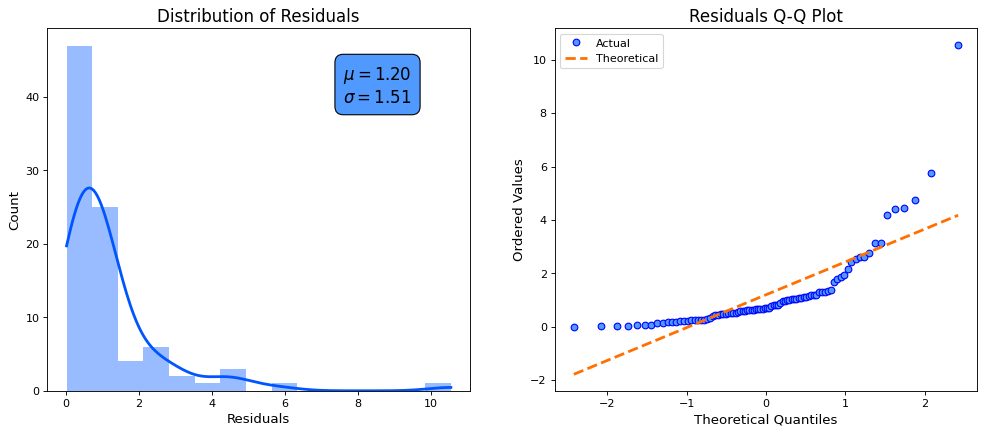

In [69]:
normal_errors_assumption(linear_reg, X_test_scaled, y_test)


**In QQ Plot of residuals:**  
* **The bow-shaped pattern of deviations from the diagonal implies that the residuals have excessive skewness.**
* **The s-shaped pattern of deviations from the diagonal implies excessive kurtosis of the residuals (there are either too many or too few large errors in both directions.)**

**Potential solutions:**
* **Nonlinear transformation of target variable and features**
* **Removing potential outliers**

## 9.3 Assumption 3: No Multicollinearity

**Multicollinearity occurs when the independent variables are correlated to each other. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison. The coefficient estimates can swing wildly based on which other independent variables are in the model and they become very sensitive to small changes in the model. Therefore, the estimates will be less precise and highly sensitive to particular sets of data. This increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant. On the other hand, the simultaneous changes of the independent variables can lead to large fluctuations of the target variable, which leads to the overfitting of the model and the reduction of its performance.**

**To detect multicolinearity, we can:**
* **Use a heatmap of the correlation (step 7)**  
* **Examine the variance inflation factor (VIF)**  

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def multicollinearity_assumption(X):
    ''''
    This assumes that predictors are not correlated with each other and calculates VIF values of predictors
    '''
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    possible_multicollinearity = sum([1 for v in vif if v > 10])
    definite_multicollinearity = sum([1 for v in vif if v > 100])
    
    print('{} cases of possible multicollinearity.'.format(possible_multicollinearity))
    print('{} cases of definite multicollinearity.'.format(definite_multicollinearity))
    
    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied.')
        else:
            print('Assumption possibly satisfied.')
    else:
        print('Assumption not satisfied.')
    
    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)

In [71]:
multicollinearity_assumption(X)


1 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption possibly satisfied.


,vif
Present_Price,5.14
Kms_Driven,5.34
Owner,1.10
Age,8.15
Fuel_Type_Diesel,6.11
Fuel_Type_Petrol,16.86
Seller_Type_Individual,2.61
Transmission_Manual,9.59


**The higher the value of VIF the higher correlation between this variable and the rest. A rule of thumb is that if VIF > 10 then multicollinearity is high.**

**Fuel_Type_Petrol is highly mutlicollinearity with others**

**Potential solutions:**
* **Using Regularization**  
* **Removing features with high values of VIF**  
* **Using PCA -> Reducing features to a smaller set of uncorrelated components**  

## 9.4 Assumption4: No Autocorrelation of residuals:


**This assumes no autocorrelation of the residuals. The presence of autocorrelation usually indicates that we are missing some information that should be captured by the model. Our model can be systematically biased by under-prediction or over-prediction under certain conditions. This could be the result of violating the linearity assumption.**

**To investigate this assumption we can perform a Durbin-Watson test to determine whether the correlation is positive or negative:** 

* **The test statistic always has a value between 0 and 4**
* **Values of 1.5 < d < 2.5 means that there is no autocorrelation in the data**
* **Values < 1.5 indicate positive autocorrelation, values > 2.5 indicate negative autocorrelation**

In [72]:
from statsmodels.stats.stattools import durbin_watson
def autocorrelation_assumption(model, X_test, y_test):
    '''
    It assumes that there is no autocorrelation in the residuals. If there is autocorrelation, then 
    there is a pattern that is not explained because the current value is dependent on the previous value.
    '''
    df_results = residuals(model, X_test, y_test)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', round(durbinWatson,3))
    
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation. Assumption not satisfied.', '\n')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation. Assumption not satisfied.', '\n')
    else:
        print('Little to no autocorrelation. Assumption satisfied.', '\n')

In [73]:
autocorrelation_assumption(linear_reg, X_test_scaled, y_test)


Durbin-Watson: 1.105
Signs of positive autocorrelation. Assumption not satisfied. 



## 9.5 Assumption 5: Homoscedasticity

**Homoscedasticity means that the residuals doesn’t change across all the values of the target variable.**

**When residuals do not have constant variance, it is difficult to determine the true standard deviation of the forecast errors, usually resulting in confidence intervals that are too wide/narrow. The effect of heteroscedasticity might also be putting too much weight to a subset of data when estimating coefficients.To investigate if the residuals are homoscedastic, we can look at a plot of residuals vs. predicted values. The placement of the points should be random and no pattern (increase/decrease in values of residuals) should be visible.**

In [74]:
def homoscedasticity_assumption(model, X_test, y_test):
    """
    Homoscedasticity assumes that the residuals exhibit constant variance
    """
    print('The orange line should be flat:')
    df_results = residuals(model, X_test, y_test)
    
    fig = plt.figure(figsize=(6,6), dpi=80)
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True,
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    plt.axhline(y=0, color='#23bf00', lw=1)
    plt.title('Residuals vs. Predicted Values', fontsize=15)
    plt.xlabel('Predicted Values', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)    
    plt.show()


The orange line should be flat:


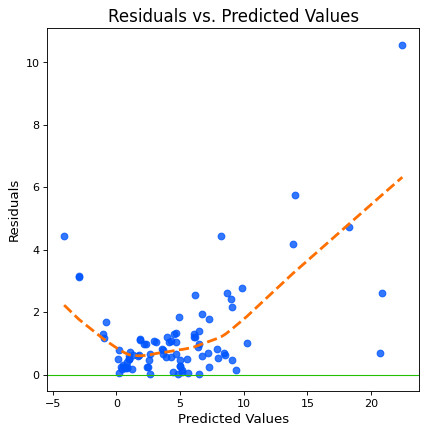

In [75]:
homoscedasticity_assumption(linear_reg, X_test_scaled, y_test)


**We can not see a fully uniform variance across our residuals because the orange line is not flat. The assumption is not satisfied.**

**Potential solutions:**  
**Outlier removal**  
**Appllying log transformation of independent variables**  
**Applying polynomial regression**  

# 10 Solution

1. **To satisfy the multicollinearity assuption, we remove the Fuel_Type_Petorl feature**  
2. **Make Box-Cox Transformtaion to the whole dataset to solve the Linearity assumption**
3. **By applying polynomial regression, we will try to improve the satisfaction of homoscedasticity and normality of residuals**  
4. **Finally, we will use regularization to reduce the probability of the model to be overfit**  

## 10.1 Apply Box-Cox Transformation:

**In order to satisfy the regression assumptions, we apply the Box-Cox transformation on the whole dataset. The Box-Cox transformations change the shape of our data, making it more close to a normal distribution.**

**In order to prevent data leakage, the fitted lambda value for each feature is obtained from the training data set and then the transformation is applied to the both training and test data:**

In [76]:
from scipy.special import inv_boxcox

fitted_lambda = pd.Series(np.zeros(len(df1.columns), dtype=np.float64), index=df1.columns)

y_train, fitted_lambda['Selling_Price'] = stats.boxcox(y_train+1)
for col in X_train.columns:
    X_train[col], fitted_lambda[col] = stats.boxcox(X_train[col]+1)
    
fitted_lambda

Selling_Price             -0.035121
Present_Price              0.078725
Kms_Driven                 0.350131
Owner                    -30.152327
Age                       -0.360231
Fuel_Type_Diesel          -7.291035
Fuel_Type_Petrol           6.903209
Seller_Type_Individual    -2.568079
Transmission_Manual       14.414394
dtype: float64

In [77]:
y_test = stats.boxcox(y_test+1, fitted_lambda['Selling_Price'])
for col in X_test.columns:
    X_test[col] = stats.boxcox(X_test[col]+1, fitted_lambda[col])

In [78]:
y_train = pd.DataFrame(y_train, index=X_train.index, columns=['Selling_Price'])
y_test = pd.DataFrame(y_test, index=X_test.index, columns=['Selling_Price'])

X_boxcox = pd.concat([X_train, X_test])
y_boxcox = pd.concat([y_train, y_test])

df_boxcox = pd.concat([X_boxcox, y_boxcox], axis=1)
df_boxcox.sort_index(inplace=True)

del df_boxcox['Fuel_Type_Petrol']

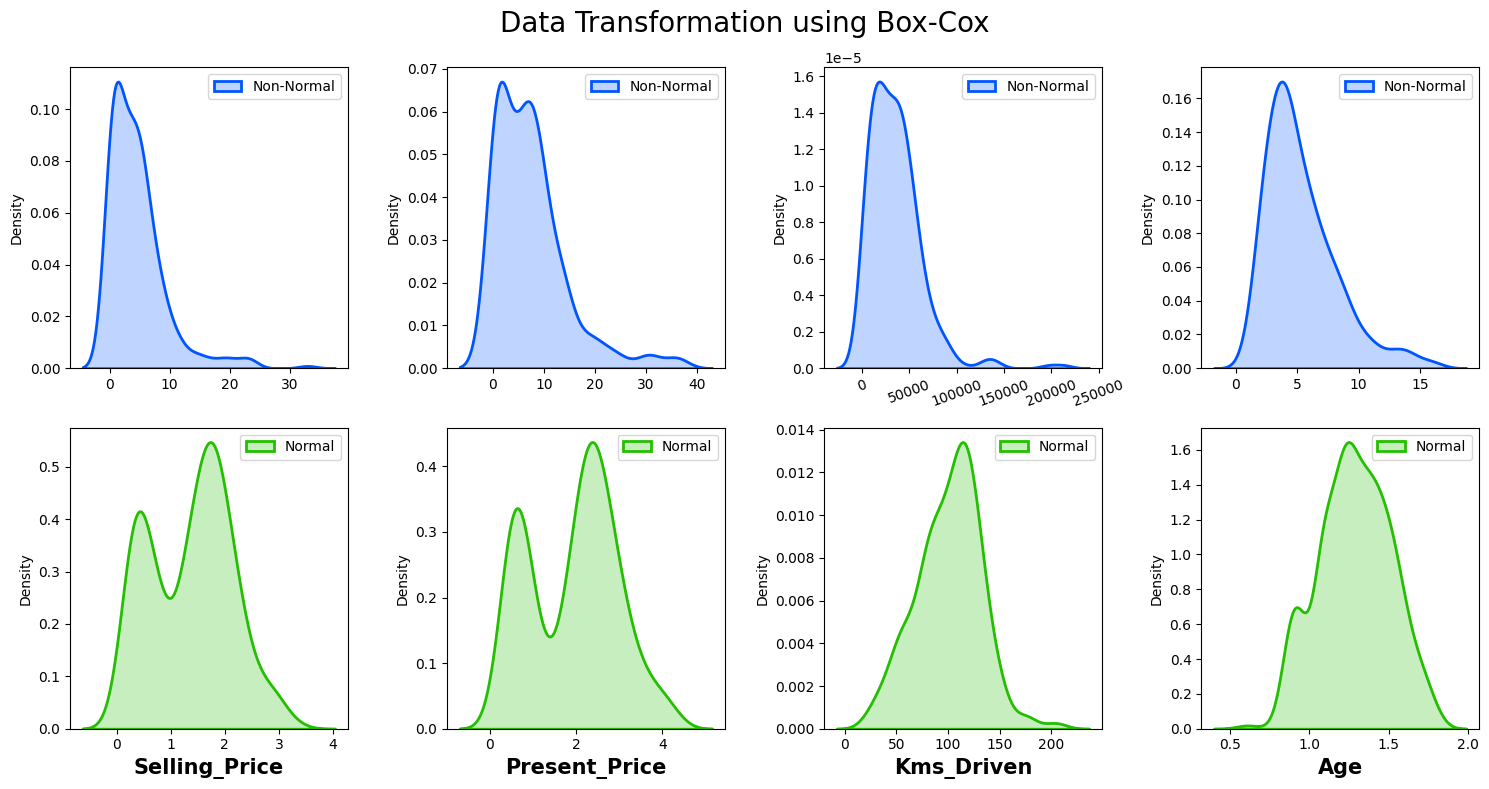

In [79]:
fig, ax = plt.subplots(2, 4, figsize=(15,8), dpi=100)
columns = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']

for i, col in enumerate(columns):
    sns.kdeplot(df1[col], label="Non-Normal", fill=True, color='#0055ff', linewidth=2, ax=ax[0,i])
    sns.kdeplot(df_boxcox[col], label="Normal", fill=True, color='#23bf00', linewidth=2, ax=ax[1,i])  
    ax[0,i].set_xlabel('', fontsize=15)
    ax[1,i].set_xlabel(col, fontsize=15, fontweight='bold')
    ax[0,i].legend(loc="upper right")
    ax[1,i].legend(loc="upper right")

ax[0,2].tick_params(axis='x', labelrotation = 20)
plt.suptitle('Data Transformation using Box-Cox', fontsize=20)
plt.tight_layout()
plt.show()

**As we can see the Distribution of the variables is closer to normal distribution after applying Box-Cox.**

In [80]:
X = df_boxcox.drop('Selling_Price', axis=1)
y = df_boxcox['Selling_Price']

## 10.2 Build 2nd-oreder polynomial Regression

**In order to overcome under-fitting and meet linear regression assumptions, first we try to increase the complexity of the model by adding all of the second-order terms of the features:**

In [81]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head(5)

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Present_Price^2,Present_Price Kms_Driven,Present_Price Owner,...,Age^2,Age Fuel_Type_Diesel,Age Seller_Type_Individual,Age Transmission_Manual,Fuel_Type_Diesel^2,Fuel_Type_Diesel Seller_Type_Individual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Transmission_Manual^2
0,2.032688,98.846654,0.0,1.320187,0.000000,0.0,1514.777352,4.131820,200.924399,0.0,...,1.742893,0.000000,0.0,1999.789096,0.000000,0.0,0.000000,0.0,0.0,2.294550e+06
1,2.587658,116.843776,0.0,1.398824,0.136279,0.0,1514.777352,6.695975,302.351767,0.0,...,1.956709,0.190630,0.0,2118.907252,0.018572,0.0,206.432287,0.0,0.0,2.294550e+06
2,2.622591,60.223871,0.0,0.907273,0.000000,0.0,1514.777352,6.877982,157.942569,0.0,...,0.823145,0.000000,0.0,1374.316835,0.000000,0.0,0.000000,0.0,0.0,2.294550e+06
3,1.749435,54.276845,0.0,1.518024,0.000000,0.0,1514.777352,3.060521,94.953786,0.0,...,2.304398,0.000000,0.0,2299.468982,0.000000,0.0,0.000000,0.0,0.0,2.294550e+06
4,2.240043,116.305479,0.0,1.320187,0.136279,0.0,1514.777352,5.017792,260.529252,0.0,...,1.742893,0.179914,0.0,1999.789096,0.018572,0.0,206.432287,0.0,0.0,2.294550e+06


In [82]:
poly_features_names = poly_features.get_feature_names_out(X.columns)
len(poly_features_names)

35

**With the construction of second-order features, the number of dataframe features increased to 35**

In [83]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)


In [84]:
print('X_poly_train shape: ', X_poly_train.shape)
print('X_poly_test shape: ', X_poly_test.shape)
print('y_poly_train shape: ', y_poly_train.shape)
print('y_poly_test shape: ',y_poly_test.shape)

X_poly_train shape:  (209, 35)
X_poly_test shape:  (90, 35)
y_poly_train shape:  (209,)
y_poly_test shape:  (90,)


In [85]:
scaler = StandardScaler()
scaler.fit(X_poly_train)

X_poly_train = scaler.transform(X_poly_train)
X_poly_train = pd.DataFrame(X_poly_train, columns=poly_features_names)

X_poly_test = scaler.transform(X_poly_test)
X_poly_test = pd.DataFrame(X_poly_test, columns=poly_features_names)

In [86]:
polynomial_reg = LinearRegression()
polynomial_reg.fit(X_poly_train, y_poly_train)

LinearRegression()

In [87]:
model_evaluation(polynomial_reg, X_poly_test, y_poly_test, 'Polynomial Reg. Test')

,Polynomial Reg. Test
MAE,0.088163
MSE,0.011432
RMSE,0.106920
R2-Score,0.981584


# 11 Check the new model Assumptions

## 11.1 Assumption 1 Linearity

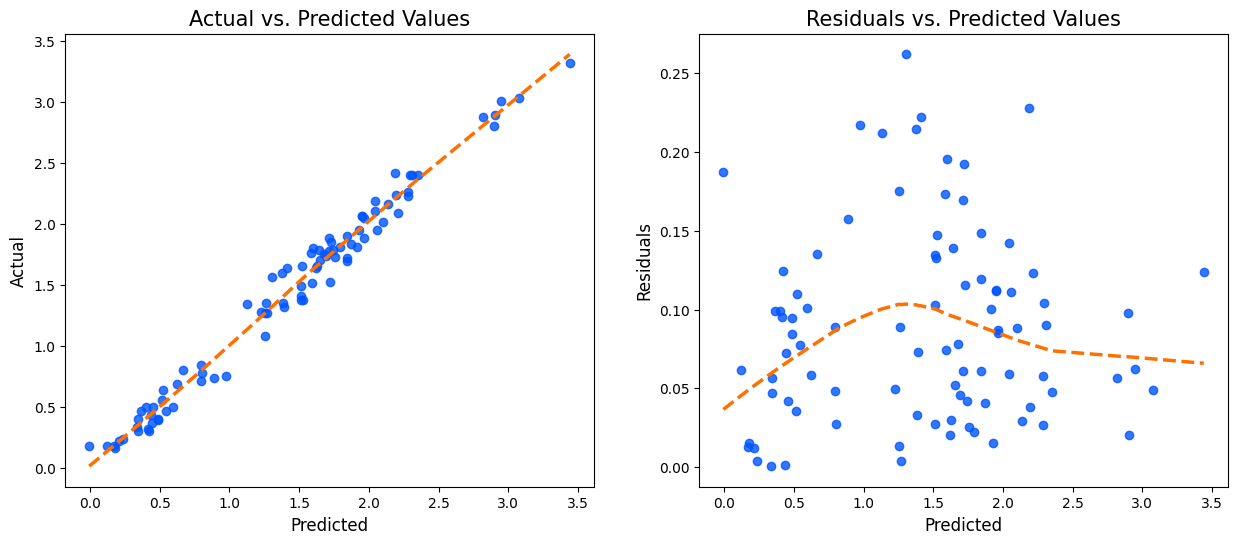

In [88]:
linear_assumption(polynomial_reg, X_poly_test, y_poly_test)


## 11.2 Assumption 2: Normality of Residuals


P-value from the test (below 0.05 generally means non-normal):   0.001545
Residuals are not normally distributed. Assumption not satisfied.


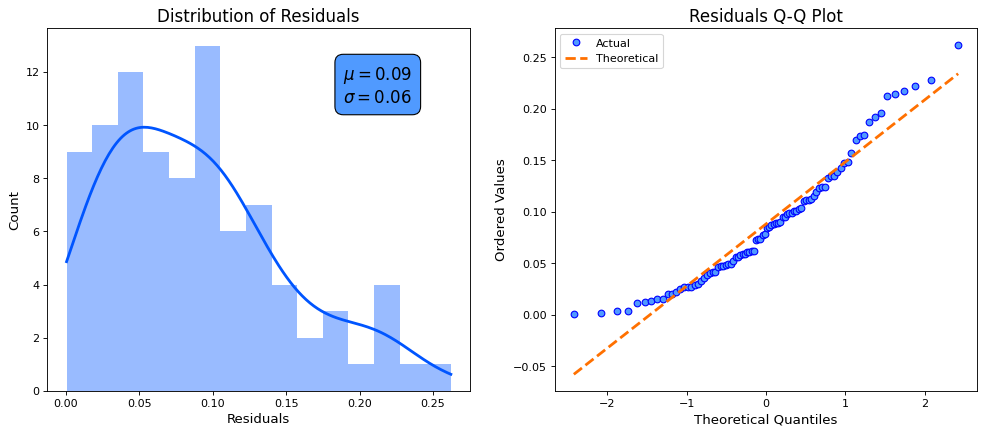

In [89]:
normal_errors_assumption(polynomial_reg, X_poly_test, y_poly_test)


## 11.3 Assumption 3: Multicollinearity

In [90]:
multicollinearity_assumption(X_poly).T


33 cases of possible multicollinearity.
28 cases of definite multicollinearity.
Assumption not satisfied.


/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual,Present_Price^2,Present_Price Kms_Driven,Present_Price Owner,...,Age^2,Age Fuel_Type_Diesel,Age Seller_Type_Individual,Age Transmission_Manual,Fuel_Type_Diesel^2,Fuel_Type_Diesel Seller_Type_Individual,Fuel_Type_Diesel Transmission_Manual,Seller_Type_Individual^2,Seller_Type_Individual Transmission_Manual,Transmission_Manual^2
vif,1600.38,2718.65,inf,5900.61,inf,inf,inf,570.1,1303.12,54.2,...,2291.33,213.59,445.54,541.95,inf,5.69,40.17,inf,139.2,inf


## 11.4 Assumption 4: No Autocorrelation of Residulas

In [91]:
autocorrelation_assumption(polynomial_reg, X_poly_test, y_poly_test)


Durbin-Watson: 0.651
Signs of positive autocorrelation. Assumption not satisfied. 



## 11.5 Assumption 5: Homoscedasticity

The orange line should be flat:


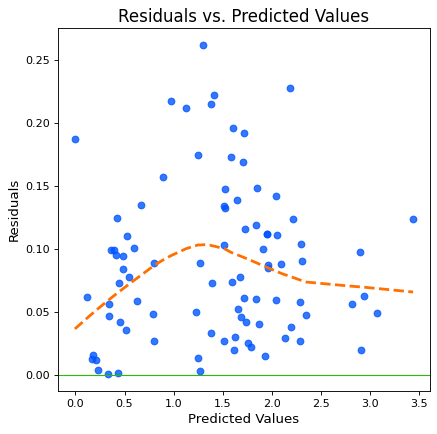

In [92]:
homoscedasticity_assumption(polynomial_reg, X_poly_test, y_poly_test)


**Not all the assumptions statsified to statisfy the Mutlicollinearity we need to do Regularization**

**And as we can see the accuracy incearse from 88% to 98%**